In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Experiments/002_WNT_phospho_test/20220609_Lysates_BCA.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [3]:
# load file
df = pd.read_excel(bca_file_path,header=14)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,1.171,1.152,1.100,0.162,0.098,0.096,0.194,0.153,0.100,0.050,0.050,0.046
B,0.921,0.830,0.812,0.161,0.124,0.103,0.113,0.117,0.117,0.047,0.046,0.046
C,0.670,0.573,0.580,0.130,0.123,0.110,0.130,0.145,0.122,0.046,0.045,0.047
D,0.531,0.501,0.474,0.140,0.117,0.096,0.121,0.116,0.117,0.045,0.045,0.045
E,0.385,0.360,0.352,0.138,0.106,0.106,0.122,0.118,0.115,0.046,0.045,0.047
F,0.246,0.233,0.231,0.045,0.048,0.046,0.046,0.046,0.046,0.044,0.045,0.046
G,0.166,0.152,0.151,0.046,0.046,0.083,0.047,0.046,0.047,0.045,0.049,0.047
H,0.078,0.074,0.071,0.045,0.044,0.047,0.047,0.046,0.045,0.048,0.046,0.047


In [5]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':2000,
    'B':1500,
    'C':1000,
    'D':750,
    'E':500,
    'F':250,
    'G':125,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['A','D']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]],
    [[1,4],[1,5]],
    [[2,4],[2,5]],
    [[3,4],[3,5]],
    [[4,4],[4,5]],
    [[0,6],[0,7],[0,8]],
    [[1,6],[1,7],[1,8]],
    [[2,6],[2,7],[2,8]],
    [[3,6],[3,7],[3,8]],
    [[4,6],[4,7],[4,8]]
]

# Sample names corresponding to the above positions
samples_names = [
    'Control 1',
    'Control 2',
    'Control 3',
    'Control 4',
    'Control 5',
    'WNT3a 1',
    'WNT3a 2',
    'WNT3a 3',
    'WNT3a 4',
    'WNT3a 5'
]

Linear model:   A=0.0005198747406149782[protein]+0.09422090171665731
Control 1:
	Mean Absorbance: 0.097
	Interpolated Concentration: 5.34570746802431  ug/mL
Control 2:
	Mean Absorbance: 0.11349999999999999
	Interpolated Concentration: 37.08412195702517  ug/mL
Control 3:
	Mean Absorbance: 0.11649999999999999
	Interpolated Concentration: 42.85474277320715  ug/mL
Control 4:
	Mean Absorbance: 0.10650000000000001
	Interpolated Concentration: 23.61934005260059  ug/mL
Control 5:
	Mean Absorbance: 0.106
	Interpolated Concentration: 22.657569916570235  ug/mL
WNT3a 1:
	Mean Absorbance: 0.149
	Interpolated Concentration: 105.36980161517859  ug/mL
WNT3a 2:
	Mean Absorbance: 0.11566666666666668
	Interpolated Concentration: 41.25179254648997  ug/mL
WNT3a 3:
	Mean Absorbance: 0.13233333333333333
	Interpolated Concentration: 73.31079708083426  ug/mL
WNT3a 4:
	Mean Absorbance: 0.118
	Interpolated Concentration: 45.740053181298144  ug/mL
WNT3a 5:
	Mean Absorbance: 0.11833333333333333
	Interpolated Conce

Text(0, 0.5, 'Net Absorbance (562nm)')

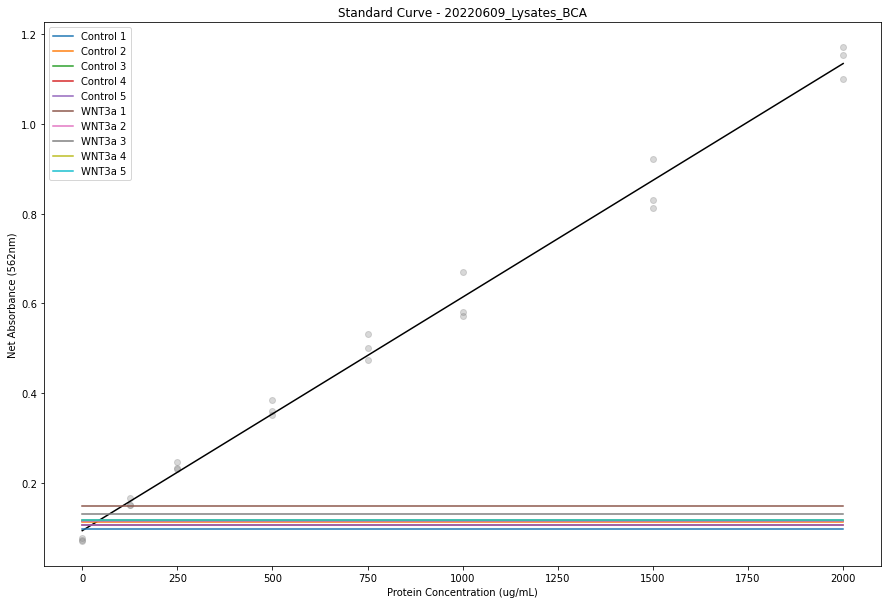

In [6]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a linear regression
slope,intercept,r_val,pval,std_err = linregress(concentrations_x,absorbances_y)
plt.plot([0,2000],[intercept,intercept+slope*2000],c='black')
print('Linear model:   A=' + str(slope) + '[protein]' + '+' + str(intercept))

# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,2000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    print('\t' + 'Interpolated Concentration: ' + str((np.mean(sample_abs)-intercept)/slope) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [7]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [20]:
# Dilution
sample_conc = 1829
initial_vol = 83.5
target_conc = 1500

add = (sample_conc*(initial_vol) - target_conc*(initial_vol))/(target_conc)

print('Amount of water to add : ' + str(add))

Amount of water to add : 18.314333333333334


In [18]:
sample_conc = 675
desired_conc = 500
desired_vol = 250

amount_sample = desired_conc*desired_vol/sample_conc
amount_diluent = desired_vol-amount_sample

print("Add " + str(amount_sample) + " sample.")
print("Dilute with " + str(amount_diluent) + " diluent.")

Add 185.1851851851852 sample.
Dilute with 64.81481481481481 diluent.
